# Seatle airbnb

Context

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.
Content

The following Airbnb activity is included in this Seattle dataset:

    Listings, including full descriptions and average review score
    Reviews, including unique id for each reviewer and detailed comments
    Calendar, including listing id and the price and availability for that day

Inspiration

    Can you describe the vibe of each Seattle neighborhood using listing descriptions?
    What are the busiest times of the year to visit Seattle? By how much do prices spike?
    Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?


Seattle AirBNB Data

The Seattle AirBnB homes data can be used at the above link. You might pair this with the Boston AirBnB data, which can be found at the link below.
Boston AirBNB Data

If you are looking to really challenge yourself, data from Seattle and Boston AirBNB homes can be used to understand how much AirBNB homes are earning in certain time frames and areas. You can compare rates between the two cities, or try to understand if there is anything about the properties that helps you predict price. Can you find negative and positive reviews based on text? This dataset requires a number of skills beyond those shown thus far in the course, but if you would like a challenge, this will certainly test your ability to work with messy, real world data.

You can find additional AirBnB data at the link here.
Choose A Dataset of Your Own

You are welcome to use Kaggle or another platform (or your own data) to create a blog and Github post instead of using the datasets discussed above.
Key Steps for Project

Feel free to be creative with your solutions, but do follow the CRISP-DM process in finding your solutions.

1) Pick a dataset.

2) Pose at least three questions related to business or real-world applications of how the data could be used.

3) Create a Jupyter Notebook, using any associated packages you'd like, to:

    Prepare data:
        Gather necessary data to answer your questions
        Handle categorical and missing data
        Provide insight into the methods you chose and why you chose them

    Analyze, Model, and Visualize
        Provide a clear connection between your business questions and how the data answers them.

4) Communicate your business insights:

    Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
    Create a blog post to share your questions and insights with a non-technical audience

Your deliverables will be a Github repo and a blog post. Use the rubric here to assist in successfully completing this project!

# Library and data

In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
# https://www.kaggle.com/airbnb/seattle/data
calendar_seattle = pd.read_csv("../data/seattle/calendar.csv")
listings_seattle = pd.read_csv("../data/seattle/listings.csv")
reviews_seattle = pd.read_csv("../data/seattle/reviews.csv")

In [3]:
list(listings_seattle)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [4]:
calendar_seattle.shape, listings_seattle.shape, reviews_seattle.shape

((1393570, 4), (3818, 92), (84849, 6))

## 1) How much AirBNB homes are earning per month in specific neighborhood area? By how much do prices spike?

In [5]:
calendar_seattle.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
calendar_seattle.isnull().mean().plot("bar")

## Prepare data:

Since I am interested in agregating and analyzing prices, I will drop all 30% of the rows with NaN.

In [7]:
calendar_seattle_dropped_na = calendar_seattle.dropna(subset=["price"])
calendar_seattle_dropped_na.shape

(934542, 4)

Convert date column into a datetime datatype.
Create year and month columns for grouping together with cleaning price columns since it contains characters, i.e. parse only numbers.

In [8]:
calendar_seattle_dropped_na['date'] = pd.to_datetime(calendar_seattle_dropped_na['date'])

calendar_seattle_dropped_na = (calendar_seattle_dropped_na
    .assign(
        year = calendar_seattle_dropped_na["date"].dt.year,
        month = calendar_seattle_dropped_na["date"].dt.month,
        price = calendar_seattle_dropped_na["price"].str.extract('(\d+)').astype(int)
        )
    )
calendar_seattle_dropped_na.head()

,listing_id,date,available,price,year,month
0,241032,2016-01-04,t,85,2016,1
1,241032,2016-01-05,t,85,2016,1
9,241032,2016-01-13,t,85,2016,1
10,241032,2016-01-14,t,85,2016,1
14,241032,2016-01-18,t,85,2016,1


In [9]:
calendar_seattle_dropped_na.describe()

,listing_id,price,year,month
count,9.345420e+05,934542.000000,934542.000000,934542.000000
mean,5.305517e+06,137.090652,2016.006097,6.661120
std,2.974821e+06,101.274170,0.077846,3.446401
min,3.335000e+03,1.000000,2016.000000,1.000000
25%,2.875975e+06,75.000000,2016.000000,4.000000
50%,5.615620e+06,109.000000,2016.000000,7.000000
75%,7.873345e+06,160.000000,2016.000000,10.000000
max,1.034016e+07,999.000000,2017.000000,12.000000


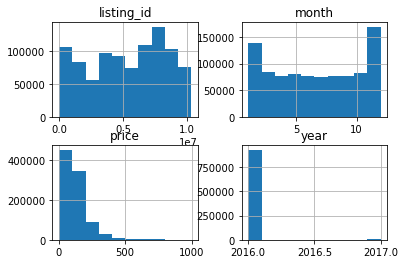

In [10]:
calendar_seattle_dropped_na.hist();

Group by listing_id, year and month, and extract mean price.

In [11]:
calendar_seattle_grouped = (calendar_seattle_dropped_na
    .groupby(["listing_id", "year", "month"])
    .agg(price_year_month_mean = pd.NamedAgg(column="price", aggfunc="mean")).astype("int")
    .reset_index()
    )
calendar_seattle_grouped

,listing_id,year,month,price_year_month_mean
0,3335,2016,2,120
1,3335,2016,3,120
2,3335,2016,4,120
3,3335,2016,5,120
4,3335,2016,6,120
...,...,...,...,...
36110,10340165,2016,9,43
36111,10340165,2016,10,43
36112,10340165,2016,11,43
36113,10340165,2016,12,43


In [12]:
listings_seattle.isnull().mean()[listings_seattle.isnull().mean() != 0].sort_values(ascending=False)

license                        1.000000
square_feet                    0.974594
monthly_price                  0.602672
security_deposit               0.511262
weekly_price                   0.473808
notes                          0.420639
neighborhood_overview          0.270299
cleaning_fee                   0.269775
transit                        0.244631
host_about                     0.224987
host_acceptance_rate           0.202462
review_scores_accuracy         0.172342
review_scores_checkin          0.172342
review_scores_value            0.171818
review_scores_location         0.171556
review_scores_cleanliness      0.171032
review_scores_communication    0.170508
review_scores_rating           0.169460
reviews_per_month              0.164222
first_review                   0.164222
last_review                    0.164222
space                          0.149031
host_response_time             0.136983
host_response_rate             0.136983
neighbourhood                  0.108958


Remove one \n value from zip code.

In [13]:
# error
listings_seattle.loc[859,"zipcode"]

'99\n98122'

In [14]:
listings_seattle = listings_seattle.assign(zipcode = pd.to_numeric(listings_seattle["zipcode"], errors='coerce'))

In [15]:
listings_seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [16]:
listings_seattle.shape, calendar_seattle_grouped.shape

((3818, 92), (36115, 4))

In [17]:
calendar_listings_joined = calendar_seattle_grouped.merge(
    listings_seattle, 
    how = "left",
    left_on = "listing_id",
    right_on= "id")

In [18]:
df_lineplot = (calendar_listings_joined
    .filter(["year", "month", "price_year_month_mean", "neighbourhood_group_cleansed"])
    .groupby(["year", "month", "neighbourhood_group_cleansed"])
    .agg(price_year_month_mean = pd.NamedAgg(column="price_year_month_mean", aggfunc="mean"))
    .reset_index()
)

In [19]:
df_lineplot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 4 columns):
year                            221 non-null int64
month                           221 non-null int64
neighbourhood_group_cleansed    221 non-null object
price_year_month_mean           221 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.0+ KB


In [20]:
df_lineplot["day"] = 1
df_lineplot["date"] = pd.to_datetime(df_lineplot[["year","month", "day"]])

In [31]:
import altair as alt
from vega_datasets import data

lineplot = alt.Chart(df_lineplot).mark_line().encode(
    x='date',
    y='price_year_month_mean',
    color='neighbourhood_group_cleansed'
)

lineplot

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


## 2) What are the busiest times of the year to visit Seattle? 

In [32]:
#alt.data_transformers.disable_max_rows()

In [37]:
calendar_listings_joined["day"] = 1
df_count = (calendar_listings_joined
    .filter(["id","year", "month"])
    .groupby(["year", "month"])["id"]
    .count()
    .reset_index()
    .assign(date = pd.to_datetime(calendar_listings_joined[["year","month", "day"]]))
    .rename(columns={"id" : "listing_count"})
)


In [38]:
df_count

,year,month,listing_count,date
0,2016,1,2868,2016-02-01
1,2016,2,2895,2016-03-01
2,2016,3,2950,2016-04-01
3,2016,4,3002,2016-05-01
4,2016,5,2705,2016-06-01
5,2016,6,2720,2016-07-01
6,2016,7,2503,2016-08-01
7,2016,8,2561,2016-09-01
8,2016,9,2649,2016-10-01
9,2016,10,2694,2016-11-01


In [60]:
alt.Chart(df_count).mark_line(point=True, color="red").encode(
    x='date',
    y='listing_count'
)

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


Top 3 months based on the total listing count

In [45]:
df_count.nlargest(columns="listing_count", n=3)

,year,month,listing_count,date
3,2016,4,3002,2016-05-01
2,2016,3,2950,2016-04-01
12,2017,1,2931,2016-01-01


In [46]:
calendar_listings_joined["day"] = 1
df_price = (calendar_listings_joined
    .filter(["id","year", "month", "price_year_month_mean"])
    .groupby(["year", "month"])["price_year_month_mean"]
    .agg("mean")
    .reset_index()
    .assign(date = pd.to_datetime(calendar_listings_joined[["year","month", "day"]]))
)
df_point = df_count.merge(df_price, how="left", on="date")

# 3) Are there any correlations between any of the numerical attributes and the mean montly price of listings.

In [96]:
corrMatrix  = calendar_listings_joined.select_dtypes(include=["float64", "int32"]).drop(columns=["latitude","longitude", "license"]).corr()
corrMatrix = corrMatrix[(corrMatrix >= 0.5) | (corrMatrix <= -0.5)]

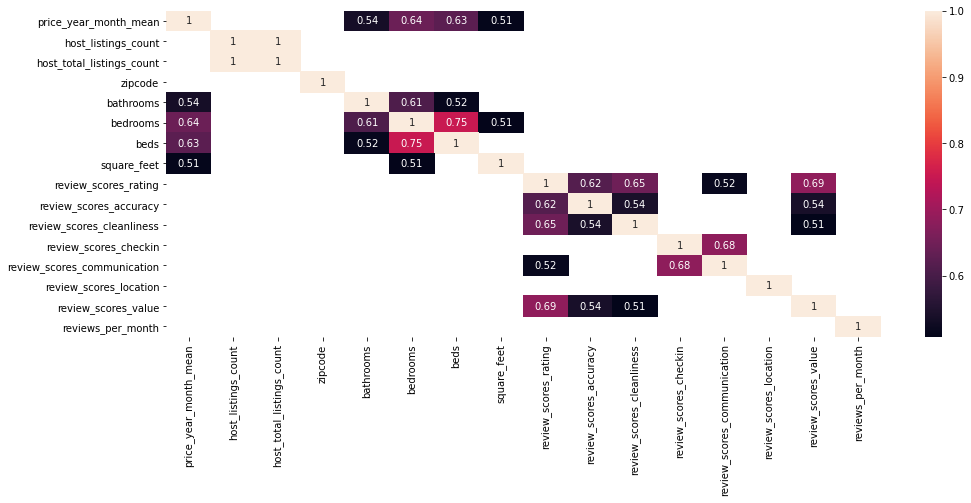

In [97]:
plt.figure(figsize=(16,6))
sn.heatmap(corrMatrix, annot=True)
plt.show()